# LDA(Linear Discriminant Analysis)

# What is LDA🤔❓

> Linear Discriminant Analysis or LDA is a dimensionality reduction technique. It is used as a pre-processing step in Machine Learning and applications of pattern classification. The goal of LDA is to project the features in higher dimensional space onto a lower-dimensional space in order to avoid the curse of dimensionality and also reduce resources and dimensional costs.




# Why to use LDA?

>1.  Helps in **Classification**.
2.   Helps in **Dimensionality** **reduction**.





# How does **LDA** work?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
X1=np.array([0,0.4,0.1,-0.2,0.5,1.1,-0.2,-0.1,0.2,0.2,-0.4,-0.2,-0.3,0.2,0,-0.6,-0.8,0.3,-0.2,0])
X2=np.array([4,6,8,12,-2,-1,7,4,-1,-7,2,-13,-3,-7,-3,-1,-1,-3,-6,5])


In [3]:
X1=pd.DataFrame(X1,columns=['X1'])
X2=pd.DataFrame(X2,columns=['X2'])
target=pd.DataFrame(np.ones(20),columns=['Target'])
data=pd.concat([X1,X2,target],axis=1)


In [4]:
data['Target'].iloc[10:20]=data['Target'].iloc[10:20]*2

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# Step by Step LDA(Classification)

### Step 1:- Covariance matrix

In [5]:
Features=data.iloc[:,[0,1]]

In [6]:
covariance=Features.cov()
covariance

,X1,X2
X1,0.171579,-0.089474
X2,-0.089474,36.421053


After finding the covariance matrix we need to **inverse** it



In [7]:
inverse=np.linalg.inv(covariance)
inverse

array([[5.83569682, 0.01433625],
       [0.01433625, 0.02749187]])

Step 1✅

### Step 2: We need to find the **mean** **difference** between *each class* for respective variable.

In [8]:
class1=data[data['Target']==1]
class2=data[data['Target']==2]

In [9]:
X1_diff=np.average(class1['X1'])-np.average(class2['X1'])
X2_diff=np.average(class1['X2'])-np.average(class2['X2'])

In [10]:
Mean_diff=np.array([X1_diff,X2_diff])
Mean_diff

array([0.4, 6. ])

Step 2✅

### Step 3: We need to find the Grand mean.


> Grand mean is bascically the mean of each variable which will help us to find the cutoff point.




In [11]:
Grand_means=np.average(Features['X1']),np.average(Features['X2'])

In [12]:
Grand_means=np.array(Grand_means)

In [13]:
Grand_means

array([0., 0.])

Step 3✅

### Step 4: We need to find a vector that will divide the data most accuratly when the data set is projected on it.


> So we need to use matrix multiplication of:
1.   **Inverse** of the Covariance matrix.
2.   Mean Differences.





In [14]:
vector=np.dot(inverse,Mean_diff)

Step 4✅

### Step 5: We need to find the cutoff point.

> Cutoff point is a value which help us the predict.



In [15]:
Cutoff_point=np.dot(vector,Grand_means)

In [16]:
Cutoff_point

0.0

Step 5✅

### Step 6: We need to get the Slope and Intercept of the vector for ploting and the project the data

In [17]:
Slope=-vector[0]/vector[1]
Intercept=Cutoff_point/vector[1]

In [18]:
Slope,Intercept

(-14.1798418972332, 0.0)

Creat new varibale which is projected on the vector it can we any of the 2 var(X1,X2)


In [19]:
New_X1=Features['X1']*Slope+Intercept


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='X1', ylabel='X2'>

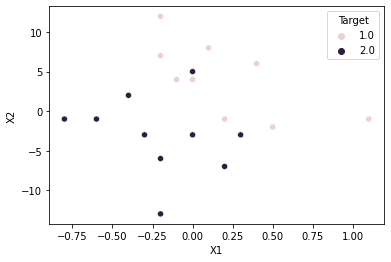

In [20]:
sns.scatterplot(Features['X1'],Features['X2'],hue=data['Target'])

Cutoff point and Projected Data

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


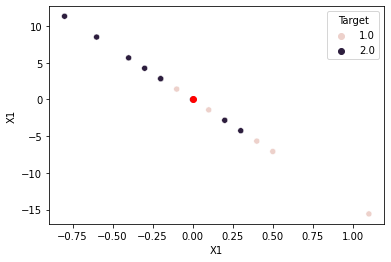

In [21]:
sns.scatterplot(Features['X1'],New_X1,hue=data['Target'])
plt.scatter(x=Grand_means[0],y=Grand_means[1], color='r')


As you can see there are some miss classificationn the upper blue part has 1 blue mark and the below skin part has 2 blue mark so it means the 
**Accuracy** is 17/20 = **0.85**.

### What About Prediction Right?


> Lets Suppose a new data comes say(-0.3,-1) we need to predict it.



In [22]:
New_x=-0.3*Slope+Intercept

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


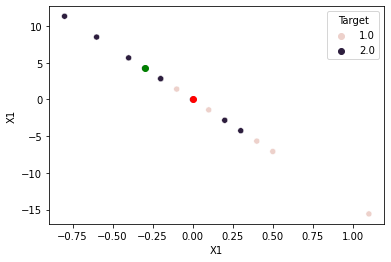

In [23]:
sns.scatterplot(Features['X1'],New_X1,hue=data['Target'])
plt.scatter(x=Grand_means[0],y=Grand_means[1], color='r')
plt.scatter(x=-0.3,y=New_x, color='g')


So as you can see the green dot falls in the blue(1) classs so it will be predicted as 2